In [1]:
import os
import json
from IPython.display import display, Markdown
import pandas as pd


In [3]:
vlg_df = pd.read_csv('outputs/vlg_cbm_faithfulness.csv')
# lf_df = pd.read_csv('outputs/cub_lf_cbm_faithfulness.csv')

In [4]:
for df in [vlg_df]:
    display(df.describe())
    df_non_empty=df[df["saliency_capture"]!=0]
    display(1-df_non_empty["iou"].count()/len(df))
    display(df_non_empty.describe())

,target_neuron,iou,saliency_ratio,saliency_capture
count,478.000000,478.000000,478.000000,478.000000
mean,238.500000,0.202444,1.221768,0.246466
std,138.130976,0.160989,0.536768,0.208717
min,0.000000,0.000000,0.000000,0.000000
25%,119.250000,0.035612,0.987501,0.035762
50%,238.500000,0.193187,1.333706,0.216569
75%,357.750000,0.347205,1.590985,0.410652
max,477.000000,0.552772,2.741316,0.904848


0.07112970711297073

,target_neuron,iou,saliency_ratio,saliency_capture
count,444.000000,444.000000,444.000000,444.000000
mean,237.472973,0.217947,1.315326,0.265339
std,139.404949,0.156589,0.432314,0.204663
min,0.000000,0.000109,0.019204,0.000051
25%,117.750000,0.057777,1.079853,0.064259
50%,238.500000,0.219948,1.361521,0.242378
75%,358.250000,0.353574,1.618316,0.421452
max,477.000000,0.552772,2.741316,0.904848


In [4]:
merged_df = pd.merge(vlg_df, lf_df, on='concept', how='inner', suffixes=('_vlg', '_lf'))

In [5]:
merged_df.describe()

,target_neuron_vlg,iou_vlg,saliency_ratio_vlg,saliency_capture_vlg,target_neuron_lf,iou_lf,saliency_ratio_lf,saliency_capture_lf
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,330.945545,0.116654,0.960055,0.189148,102.376238,0.123404,0.875635,0.206428
std,184.305479,0.112311,0.876685,0.187881,60.221622,0.109936,0.697131,0.188990
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.250000,0.000000,0.000000,0.000000,50.250000,0.000000,0.000000,0.000000
50%,328.000000,0.102986,0.975073,0.170013,101.500000,0.129691,1.043132,0.221522
75%,472.000000,0.222162,1.630404,0.336572,153.750000,0.226752,1.467100,0.376260
max,662.000000,0.400179,4.989055,0.682654,207.000000,0.316973,2.079075,0.647483


In [5]:
sum(vlg_df["saliency_capture"]==0)/len(vlg_df)

0.07112970711297072

In [7]:
sum(merged_df["saliency_capture_lf"]==0)/len(merged_df)

0.3217821782178218

In [10]:
section=4
merged_df[20*section:20*(section+1)]

,target_neuron_vlg,concept,iou_vlg,saliency_ratio_vlg,saliency_capture_vlg,target_neuron_lf,iou_lf,saliency_ratio_lf,saliency_capture_lf
80,278,thin black bill,0.023303,1.944603,0.037718,87,0.016541,1.145297,0.022051
81,281,reddish brown body,0.295735,2.211721,0.419640,63,0.288917,1.869126,0.436949
82,282,yellow wings with black bars,0.000000,0.000000,0.000000,202,0.000000,0.000000,0.000000
83,284,large orange bill,0.032340,1.776533,0.038927,44,0.085636,1.172608,0.132885
84,287,brownish wings with white bars,0.000000,0.000000,0.000000,132,0.000000,0.000000,0.000000
85,288,purple red head and breast,0.000000,0.000000,0.000000,54,0.000000,0.000000,0.000000
86,290,red cap on the head,0.000000,0.000000,0.000000,57,0.000000,0.000000,0.000000
87,293,black cap and bib,0.000000,0.000000,0.000000,15,0.000000,0.000000,0.000000
88,297,yellow crown,0.105366,0.738612,0.220837,105,0.228358,1.433526,0.405187
89,298,black and white body,0.049811,0.340656,0.068409,6,0.020377,0.122535,0.028534


In [31]:
sum((merged_df["saliency_capture_vlg"]<merged_df["saliency_capture_lf"])
    &(merged_df["saliency_ratio_vlg"]>merged_df["saliency_ratio_lf"])
   &(merged_df["iou_vlg"]<merged_df["iou_lf"]))


27

In [9]:
merged_df.sort_values(by="saliency_ratio_vlg", ascending=False).head(20)


,target_neuron_vlg,concept,iou_vlg,saliency_ratio_vlg,saliency_capture_vlg,target_neuron_lf,iou_lf,saliency_ratio_lf,saliency_capture_lf
142,451,yellow eye,0.047145,4.989055,0.070116,106,0.144952,2.050935,0.239941
193,629,long orange red beak,0.016778,3.516187,0.019980,47,0.021084,1.322055,0.029871
79,277,grayish white underparts,0.233528,3.084969,0.275515,143,0.183547,1.653818,0.240965
186,605,greenish yellow body,0.400179,3.015036,0.608802,39,0.293818,1.849468,0.480527
150,469,long black ear tufts,0.047793,2.829832,0.056104,157,0.047749,1.876224,0.054108
176,571,small brown body,0.358451,2.433573,0.495100,78,0.217421,1.731458,0.282532
53,203,dark blue gray upperparts,0.320149,2.354891,0.480577,133,0.275448,1.878106,0.434890
50,189,pale brown upperparts,0.313253,2.340025,0.402487,171,0.280410,1.742125,0.432823
191,616,large gray body,0.324199,2.324623,0.502140,43,0.295665,1.751439,0.483079
45,174,yellowish belly,0.313097,2.271464,0.447707,111,0.259228,1.844332,0.357278


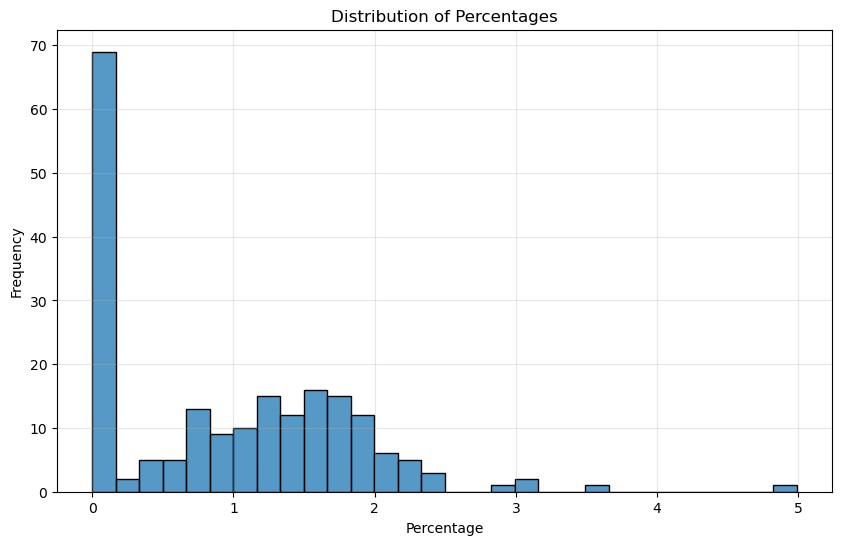

In [10]:
# using seaborn (more stylish)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x="saliency_ratio_vlg", bins=30)
plt.title("Distribution of Percentages")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

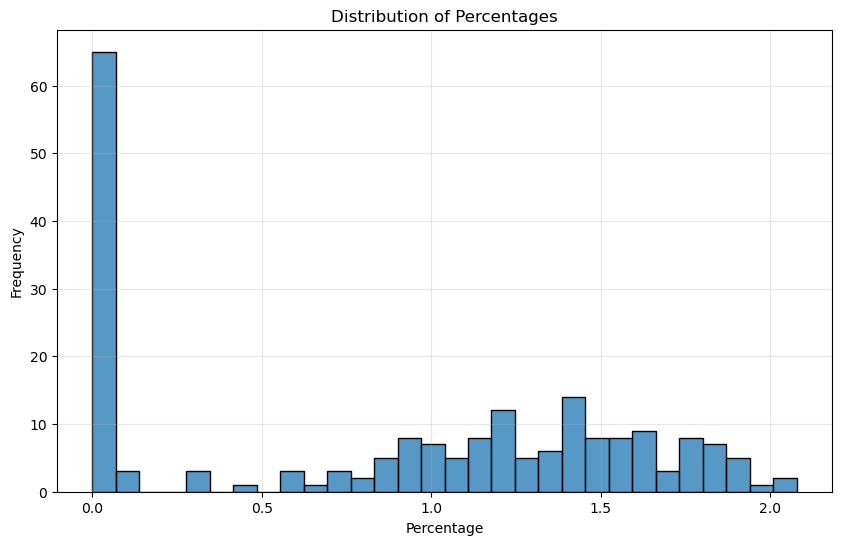

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x="saliency_ratio_lf", bins=30)
plt.title("Distribution of Percentages")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()